In [1]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [9]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift(5)

In [10]:
ts

2016-07-01   -0.942788
2016-07-02    0.241986
2016-07-03    1.036234
2016-07-04    0.914859
2016-07-05   -0.319987
2016-07-06   -0.239528
2016-07-07   -0.676551
2016-07-08    0.922408
2016-07-09    0.307325
2016-07-10    1.237731
2016-07-11   -0.324038
2016-07-12    0.843503
2016-07-13    0.386529
2016-07-14    0.962077
2016-07-15    0.008769
2016-07-16    0.061183
2016-07-17   -0.604809
2016-07-18    1.044512
2016-07-19    2.063606
2016-07-20   -1.078059
Freq: D, dtype: float64

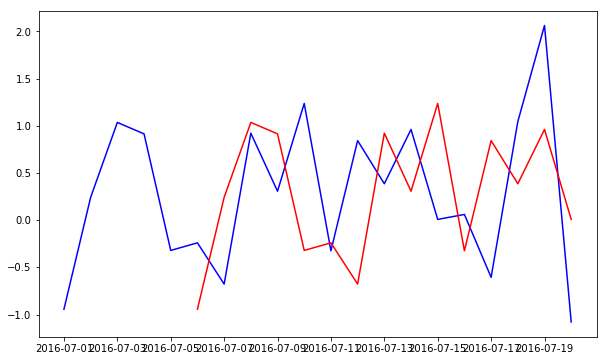

In [11]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the future' instead of into the past?

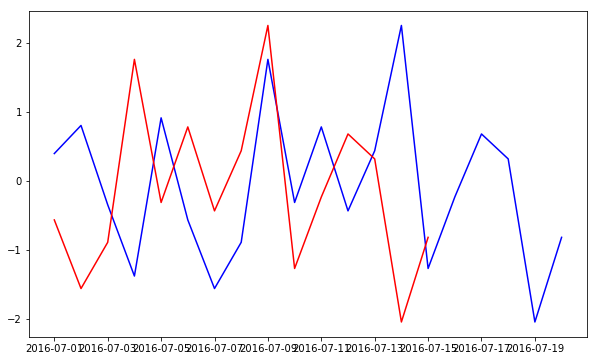

In [14]:
# %load snippets/shift_future.py
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift(-5)
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

# Window functions give you moving aggregate measures of a time series

In [9]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

In [37]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])
df

,A,B,C
2016-05-01,-0.404642,-2.447442,-0.169995
2016-05-02,-0.765264,0.988717,0.158371
2016-05-03,0.121970,-0.737018,1.623657
2016-05-04,0.607445,-0.933459,-0.970507
2016-05-05,-0.790392,-0.481222,-0.339009
2016-05-06,-0.297690,1.679673,1.810155
2016-05-07,0.347745,0.295623,1.321983
2016-05-08,-0.384067,1.583469,0.351428
2016-05-09,-1.148978,-0.688553,0.146004
2016-05-10,1.482034,-1.094435,-0.922235


In [17]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

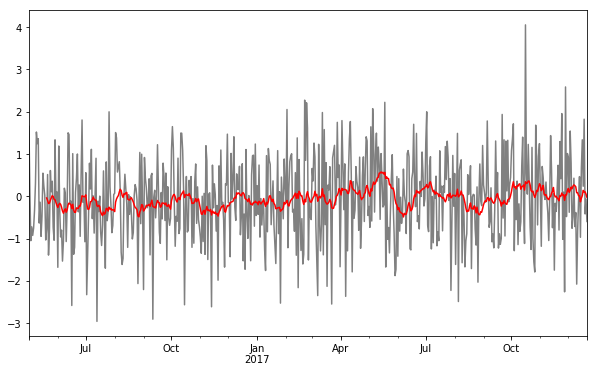

In [18]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

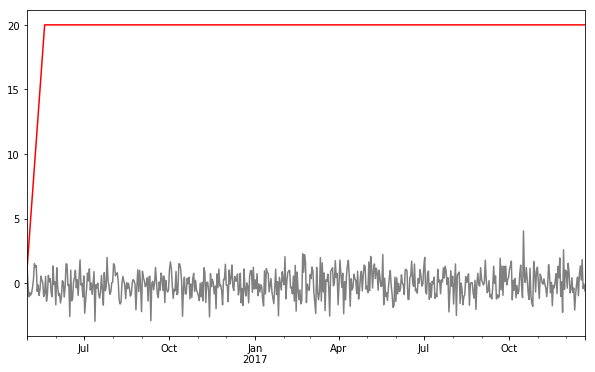

In [21]:
df['A'].plot(color = 'gray')
r.count()['A'].plot(color = 'red')

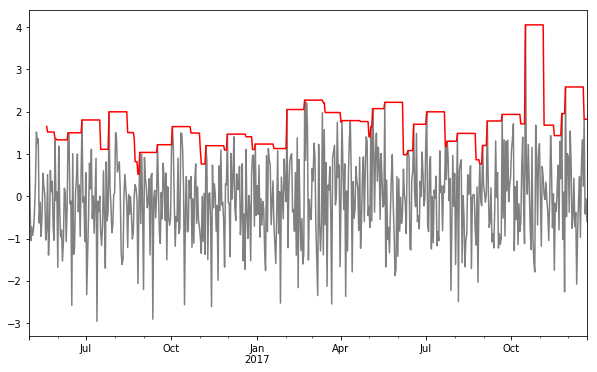

In [22]:
df['A'].plot(color = 'gray')
r.max()['A'].plot(color = 'red')

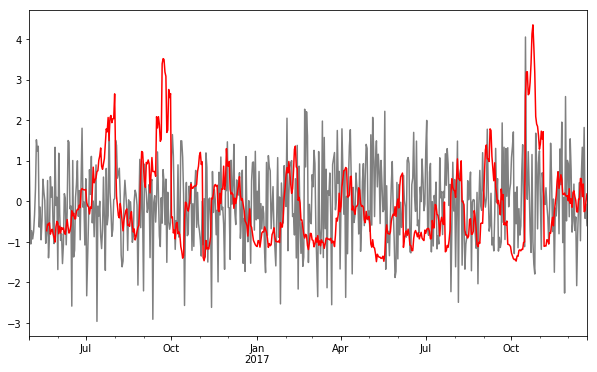

In [23]:
df['A'].plot(color = 'gray')
r.kurt()['A'].plot(color = 'red')

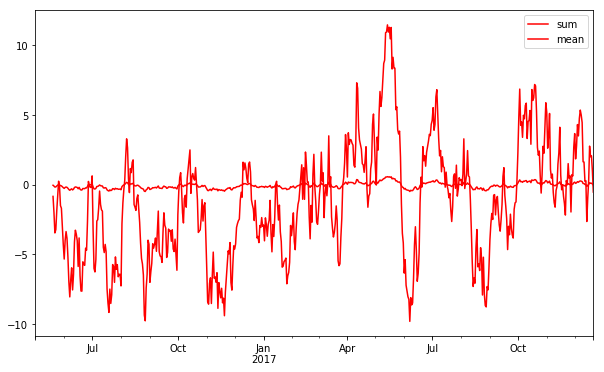

In [24]:
r.agg(['sum','mean'])['A'].plot(color = 'red')

### What about a custom function?

In [38]:
# %load snippets/custom_rolling.py
df.rolling(window = 10, center = False).apply(lambda x: x[1]/x[2])[1:10]

,A,B,C
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,-6.274211,-1.34151,0.09754


### What if I want to generate a rolling window function of monthly data from daily data?

In [26]:
# %load snippets/resample_rolling.py
ts_long = pd.Series(np.random.randn(200), pd.date_range('7/1/16', freq = 'D', periods = 200))


In [27]:
ts_long

2016-07-01    0.840500
2016-07-02    0.598904
2016-07-03   -0.011733
2016-07-04   -1.493381
2016-07-05   -1.404636
2016-07-06    1.409469
2016-07-07    0.845111
2016-07-08    0.103351
2016-07-09    0.129717
2016-07-10   -0.948644
2016-07-11   -0.644139
2016-07-12   -1.946256
2016-07-13   -1.013836
2016-07-14   -0.581004
2016-07-15   -0.447121
2016-07-16    0.292462
2016-07-17    0.115809
2016-07-18   -0.003204
2016-07-19   -0.642925
2016-07-20   -0.603362
2016-07-21    1.424404
2016-07-22    1.833739
2016-07-23   -0.007611
2016-07-24   -0.560815
2016-07-25    1.106118
2016-07-26    0.206718
2016-07-27   -0.003538
2016-07-28    0.510861
2016-07-29    0.344558
2016-07-30    1.412410
                ...   
2016-12-18    1.099272
2016-12-19    1.920421
2016-12-20   -1.239615
2016-12-21    1.498480
2016-12-22    0.203758
2016-12-23    0.276743
2016-12-24    0.667843
2016-12-25   -0.707874
2016-12-26   -0.704960
2016-12-27   -1.096478
2016-12-28    0.573314
2016-12-29    1.193475
2016-12-30 

In [29]:
ts_long.resample('M').mean().rolling(window=3).mean()

2016-07-31   -0.049329
2016-08-31    0.035174
2016-09-30   -0.063830
2016-10-31    0.058456
2016-11-30    0.268512
2016-12-31    0.241795
2017-01-31    0.092859
Freq: M, dtype: float64

In [30]:
ts_long.resample('M').mean().rolling(window = 3).mean()

2016-07-31         NaN
2016-08-31         NaN
2016-09-30   -0.025995
2016-10-31    0.009934
2016-11-30    0.087713
2016-12-31    0.189588
2017-01-31    0.201055
Freq: M, dtype: float64

## Expanding windows

In [39]:
df

,A,B,C
2016-05-01,-0.404642,-2.447442,-0.169995
2016-05-02,-0.765264,0.988717,0.158371
2016-05-03,0.121970,-0.737018,1.623657
2016-05-04,0.607445,-0.933459,-0.970507
2016-05-05,-0.790392,-0.481222,-0.339009
2016-05-06,-0.297690,1.679673,1.810155
2016-05-07,0.347745,0.295623,1.321983
2016-05-08,-0.384067,1.583469,0.351428
2016-05-09,-1.148978,-0.688553,0.146004
2016-05-10,1.482034,-1.094435,-0.922235


In [36]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,0.270060,-1.469776,0.439426
2016-05-03,0.036559,-1.503361,1.122728
2016-05-04,-0.005551,-1.031087,0.916300
2016-05-05,0.155788,-0.790037,0.957493


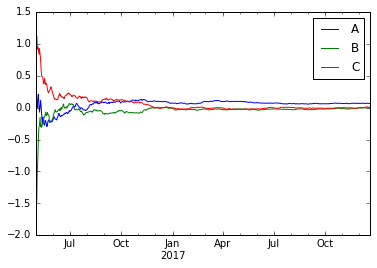

In [41]:
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

In [42]:
ts= pd.Series(np.random.randn(1000),pd.date_range(start='01-01-2006',periods=1000,freq='D'))

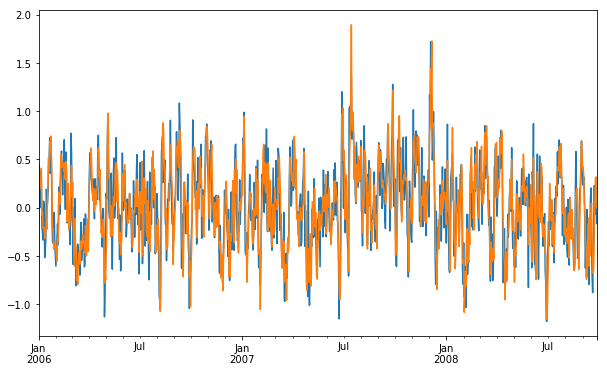

In [46]:
ts.ewm(span=5,freq='D',min_periods=0,adjust=True).mean().plot()
ts.rolling(window=5).mean().plot()

In [47]:
r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,NaN,NaN,NaN


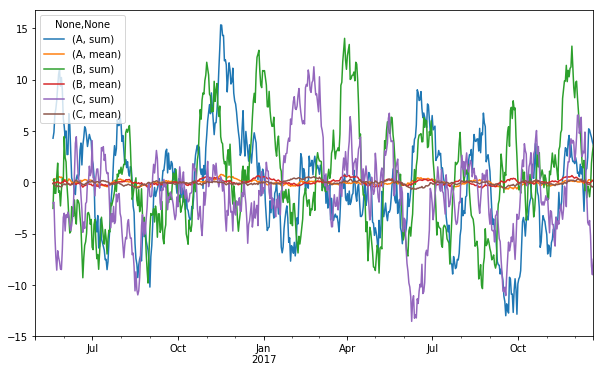

In [48]:
df.rolling(window=20).agg(['sum','mean']).plot()

A         B         C      
           sum count sum count sum count
2016-05-01 NaN   1.0 NaN   1.0 NaN   1.0
2016-05-02 NaN   2.0 NaN   2.0 NaN   2.0
2016-05-03 NaN   3.0 NaN   3.0 NaN   3.0
2016-05-04 NaN   4.0 NaN   4.0 NaN   4.0
2016-05-05 NaN   5.0 NaN   5.0 NaN   5.0

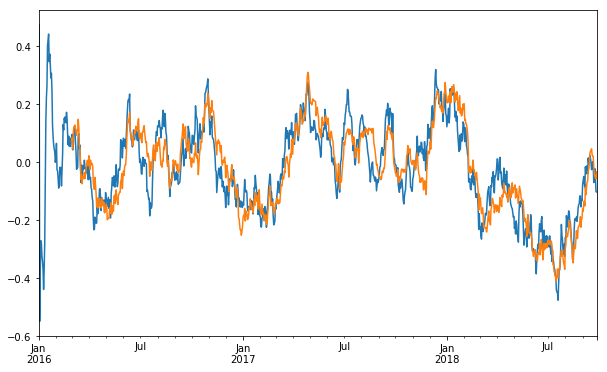

In [41]:
# %load snippets/window_funcs_try.py
#1
ts = pd.Series(np.random.randn(1000), index = pd.date_range(start = '1/1/16', periods = 1000, freq = 'D'))
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot()
ts.rolling(window = 60).mean().plot()

#2 
# To get a more reliable statistic if it makes logical sense

#3
r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])

#4
r = df.rolling(window = 20)
r.agg(['sum', 'count']).head()